# Random forest-Random Forest is an ensemble of decision tree.Insted of relying on a single decision tree, it builds multiple trees and combies their outputs

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree



In [5]:
data=pd.read_csv("winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [64]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

C:\Users\banuz\AppData\Local\Temp\ipykernel_9688\2756063966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality',data=data,palette='viridis')


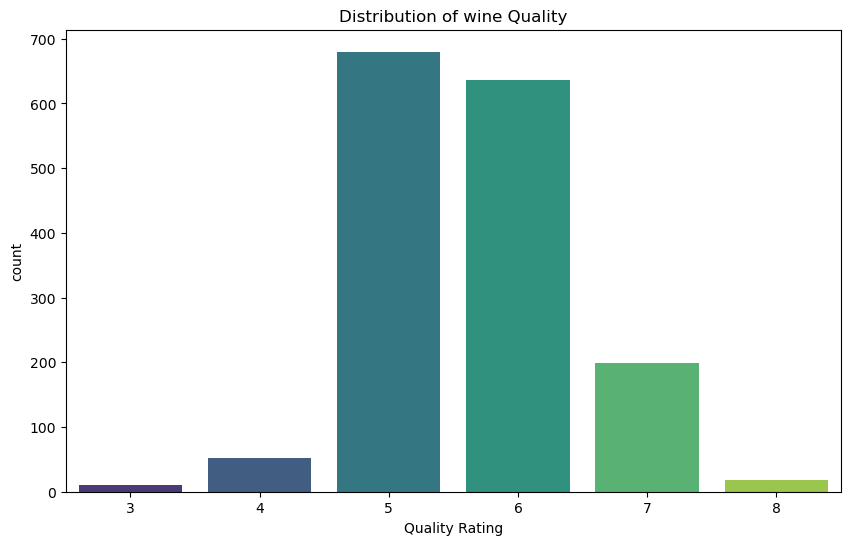

In [8]:
#plot the distribution of wine quality
plt.figure(figsize=(10,6))
sns.countplot(x='quality',data=data,palette='viridis')
plt.title('Distribution of wine Quality')
plt.xlabel('Quality Rating')
plt.ylabel('count')
plt.show()

In [9]:
#separate the independent and dependent variables
X = data.drop(columns=['quality'])  #Independent variables
y = data['quality']                  #dependent variable

In [10]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [11]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1591    5
1592    6
1593    6
1594    5
1595    6
Name: quality, Length: 1596, dtype: int64

In [12]:
#split the data into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
#train the decision Tree classifier
rf_model=RandomForestClassifier(n_estimators=3, max_depth=3,random_state=42) #n_estimators specifies that the forest should be consider
rf_model.fit(X_train,y_train)
print(rf_model.classes_)

[3 4 5 6 7 8]


In [18]:
#Evaluate the model
y_pred =rf_model.predict(X_test)
y_pred

array([5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5,
       6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6,
       5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5,
       6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5,
       6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6,
       5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6,
       6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5,

In [19]:
y_test

917     5
1121    4
1096    5
361     5
1503    6
       ..
701     4
1239    6
350     5
1040    7
1549    6
Name: quality, Length: 320, dtype: int64

In [28]:
#accuracy
accuracy= accuracy_score(y_test,y_pred)
print(f'accuracy:{accuracy}')

accuracy:0.515625


In [30]:
#classification report
class_report=classification_report(y_test,y_pred)
print(f'classification Report:\n{class_report}')

classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        14
           5       0.63      0.62      0.62       143
           6       0.43      0.65      0.51       119
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00         4

    accuracy                           0.52       320
   macro avg       0.18      0.21      0.19       320
weighted avg       0.44      0.52      0.47       320



C:\Users\banuz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\banuz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\banuz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[ 0  0  0  1  0  0]
 [ 0  0  7  7  0  0]
 [ 0  0 88 55  0  0]
 [ 0  0 42 77  0  0]
 [ 0  0  2 37  0  0]
 [ 0  0  0  4  0  0]]


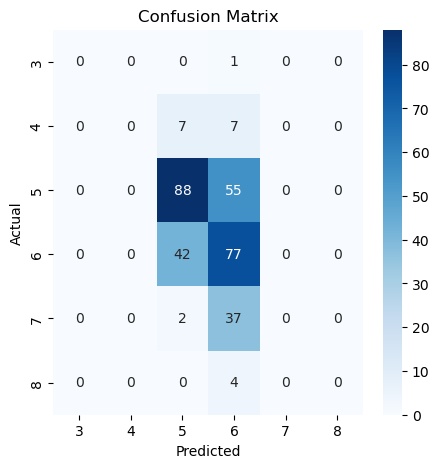

In [56]:
#plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=rf_model.classes_,yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
new_data= np.array([[7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4]])
ps=classifier.predict(new_data)

print(f'weather: {ps[0]}')

weather: 5


C:\Users\banuz\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
#features importance
feature_importances = pd.Series(rf_model.feature_importances_,index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

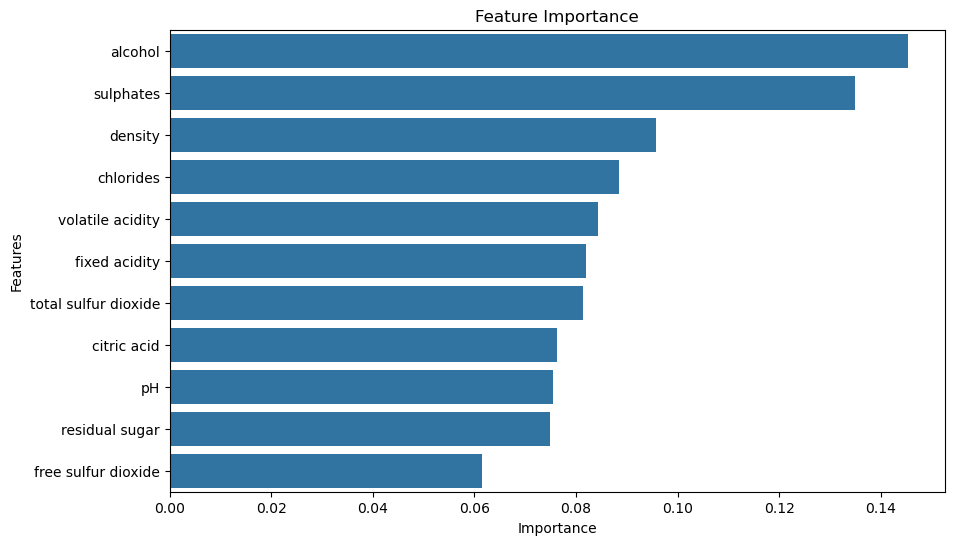

In [19]:
#plot features importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances,y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

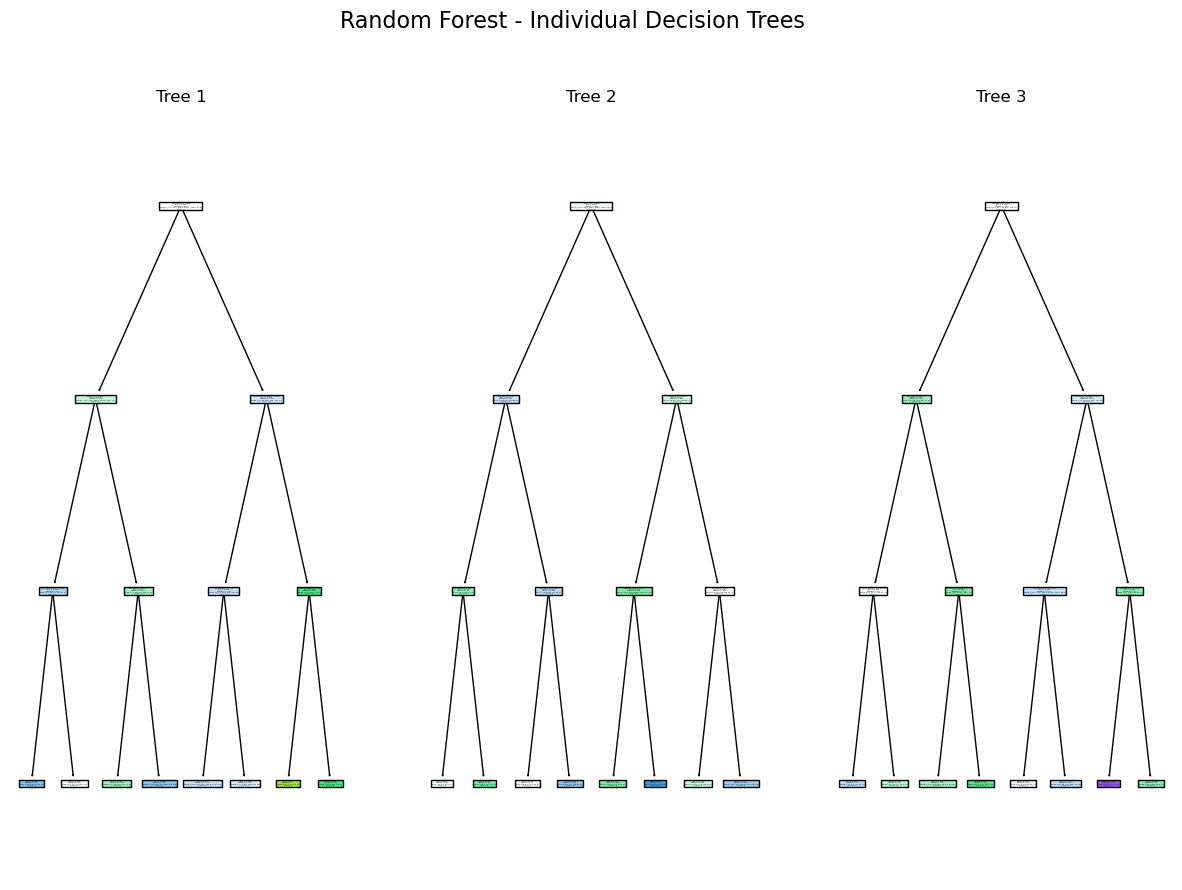

In [55]:
plt.figure(figsize=(15,10))
for i in range(len(rf_model.estimators_)):  # rf_model.estimators_ contains all the individual Decision Trees inside the Random Forest.
    plt.subplot(1, len(rf_model.estimators_), i + 1)  # Create subplots for each tree
    plot_tree(rf_model.estimators_[i], feature_names=X.columns, class_names=["3","4","5","6","7","8"], filled=True)
    plt.title(f"Tree {i+1}")

plt.suptitle("Random Forest - Individual Decision Trees", fontsize=16)
plt.show()

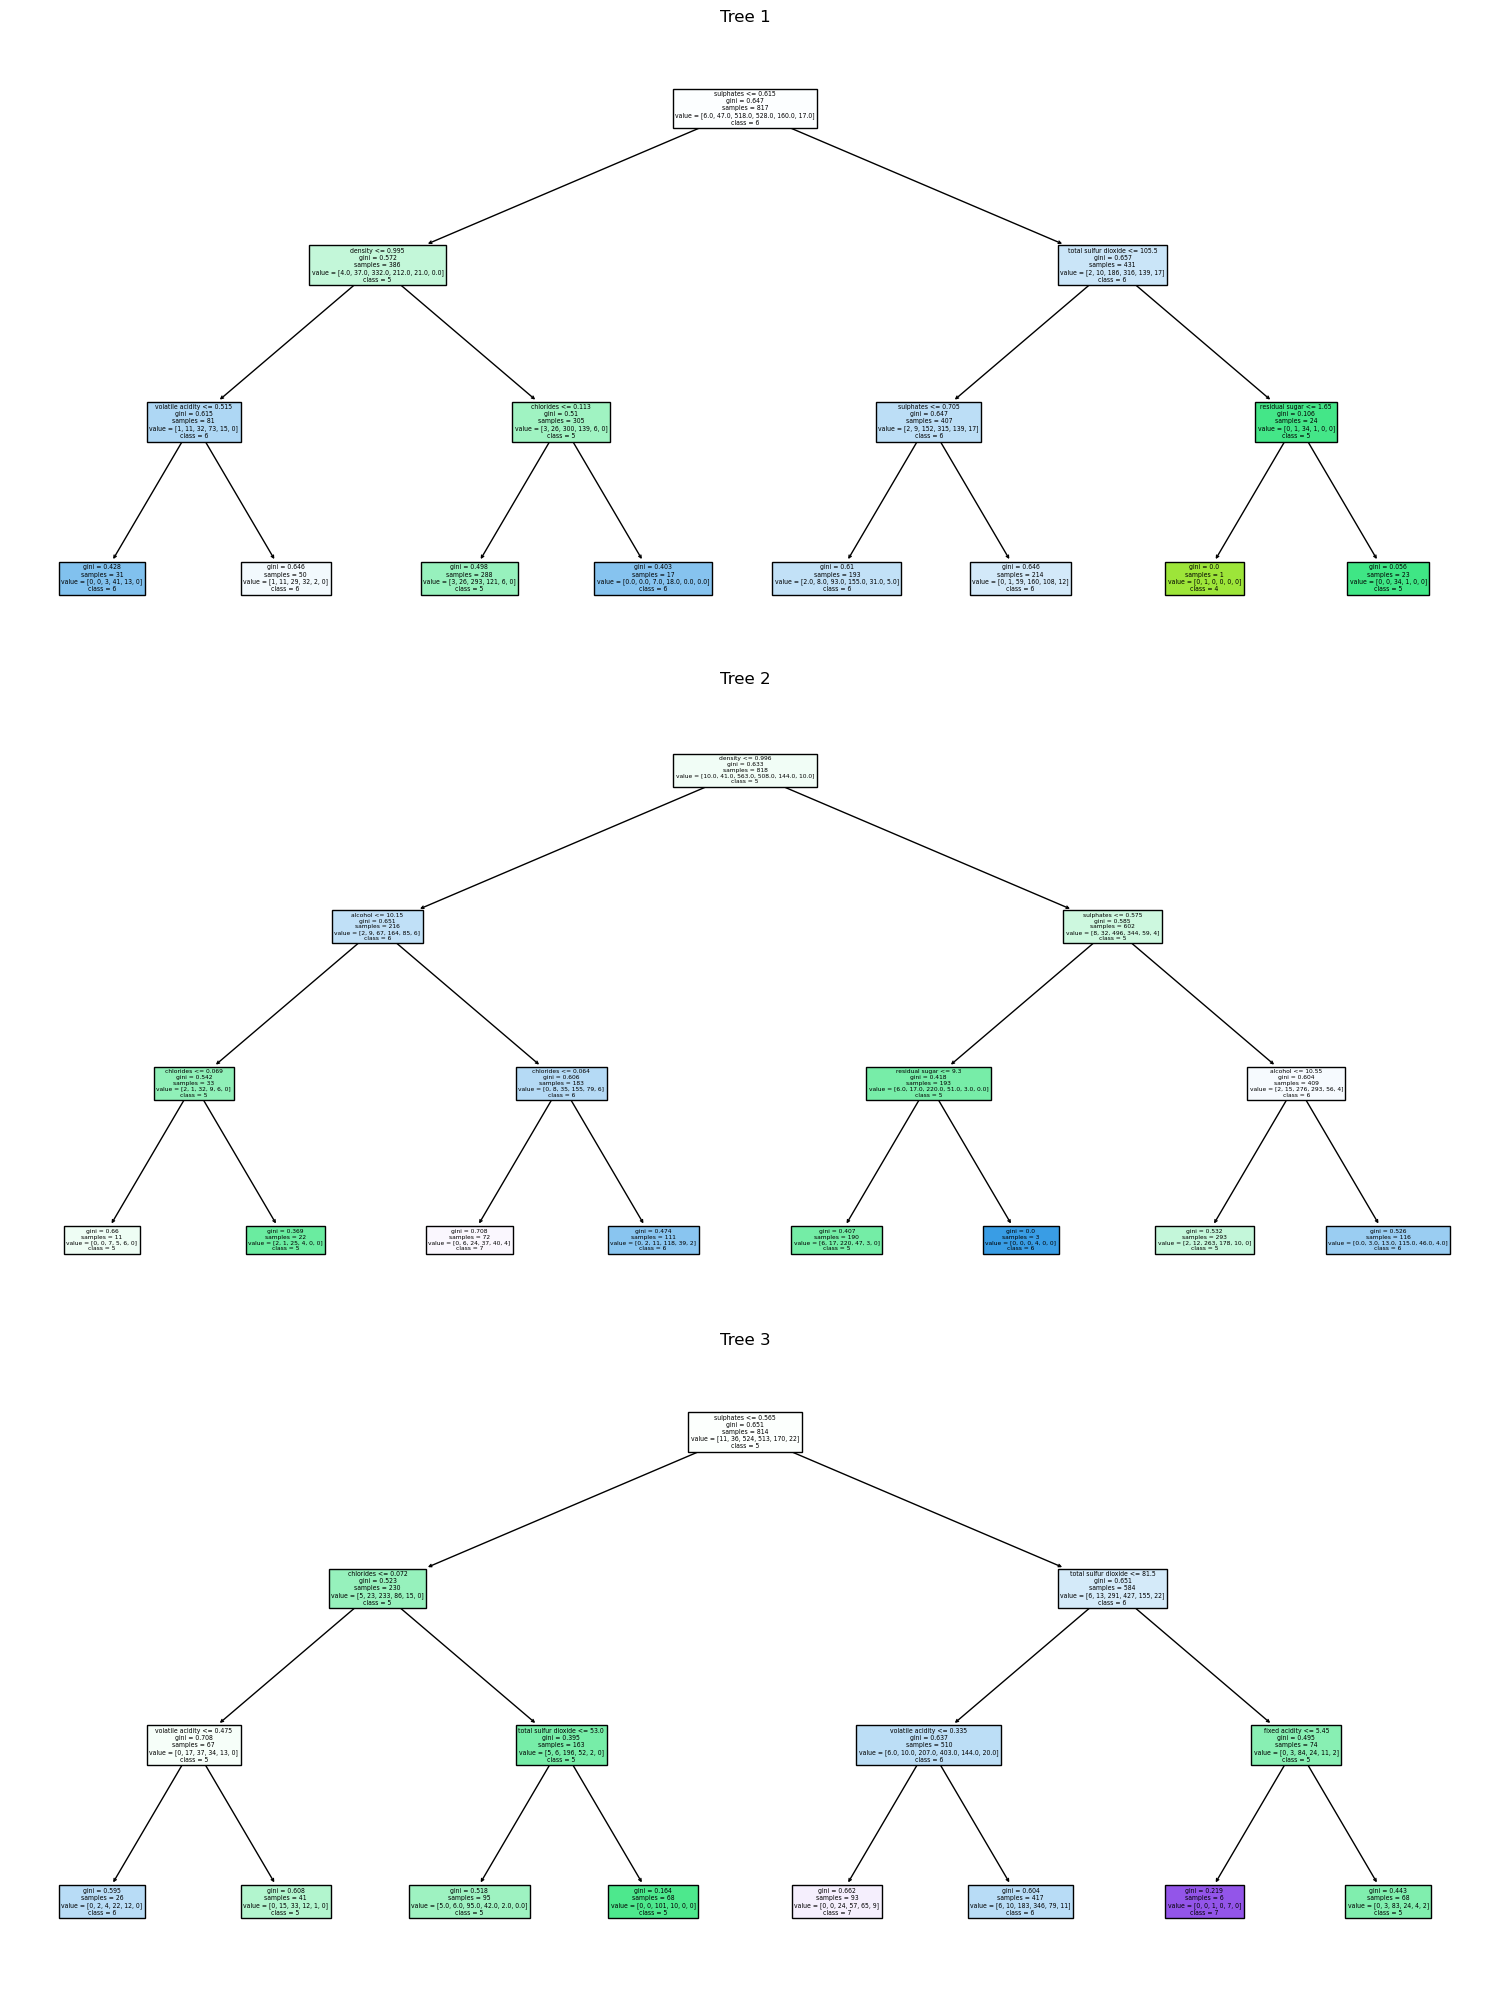

In [60]:
num_trees_to_plot = 3  # Adjust this number
plt.figure(figsize=(15, 20))
for i in range(num_trees_to_plot):  
    plt.subplot(num_trees_to_plot, 1, i + 1)
    plot_tree(rf_model.estimators_[i], feature_names=X.columns, class_names=["3","4","5","6","7","8"], filled=True)
    plt.title(f"Tree {i+1}")

plt.tight_layout()
plt.show()
